# Validation, Regularization and CallBacks

## Validation

Validation Sets are used to check the performance of the model trained on training data.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()

In [3]:
type(diabetes_data)

sklearn.utils.Bunch

In [4]:
diabetes_data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
print(diabetes_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Features and Target Seperation

In [6]:
data = diabetes_data['data']
target = diabetes_data['target']

In [7]:
data.shape, target.shape

((442, 10), (442,))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_data, test_data, train_y, test_y = train_test_split(data, target, test_size=0.1)

In [10]:
print(train_data.shape)
print(test_data.shape)
print(train_y.shape)
print(test_y.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
def get_model():
    model = Sequential([
        Dense(units = 128, activation ='relu', input_shape= (train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

In [13]:
model = get_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [15]:
model.compile(optimizer= 'adam',
             loss='mae',
             metrics=['mae'])

In [16]:
history = model.fit(train_data, train_y, validation_split = 0.15, epochs= 100, batch_size = 64, verbose =False)

In [17]:
model.evaluate(test_data,test_y, verbose =2)

2/2 - 0s - loss: 45.0097 - mae: 45.0097 - 53ms/epoch - 27ms/step


[45.00971603393555, 45.00971603393555]

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

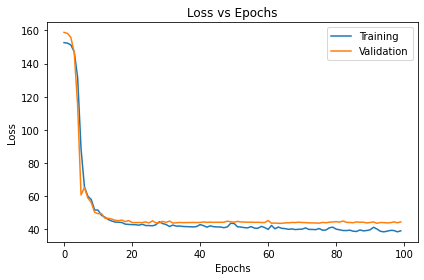

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend(['Training','Validation'])
plt.tight_layout()
plt.show()

Yeah now that happens when you forget normalization you idiot

### Normalization

In [20]:
data = diabetes_data['data']
target = diabetes_data['target']

In [21]:
target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [22]:
data = (data - data.mean())/data.std()
target = (target - target.mean())/target.std()

In [23]:
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_data, test_data, train_y, test_y = train_test_split(data, target, test_size=0.1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
def get_model():
    model = Sequential([
        Dense(units = 128, activation ='relu', input_shape= (train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

In [28]:
model = get_model()

In [29]:
model.compile(optimizer= 'adam',
             loss='mae',
             metrics=['mae'])

In [30]:
history = model.fit(train_data, train_y, validation_split = 0.15, epochs= 100, batch_size = 64, verbose =False)

In [31]:
model.evaluate(test_data,test_y, verbose =2)

2/2 - 0s - loss: 0.6494 - mae: 0.6494 - 57ms/epoch - 29ms/step


[0.6493614315986633, 0.6493614315986633]

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

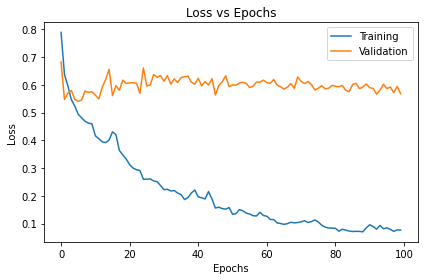

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend(['Training','Validation'])
plt.tight_layout()
plt.show()

## Model Regularization

#### We are going to use L2 Regularization which is also known as weight decay in contect of neural networks as weel as L1 regularization and dropout.

#### Here the argument passed to l2 is lambda value which gets multiplied by weight terms squares.

#### We can also use L1 Regularization where the only difference is sum of weights is calculated without squaring terms. But L1 Regularization can set some weight terms equal to zero.

#### We can also use both regularization at the same time as shown in the figure.

## Dropout

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

In [35]:
def get_regularized_model(wd, rate): #wd= weight decay, rate = dropout rate
    model= Sequential([
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation = 'relu',input_shape = (train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dropout(rate),
        Dense(1)
              
    ])
    return model

In [36]:
model = get_regularized_model(1e-5,0.3)

In [37]:
model.compile(optimizer= 'adam',
             loss= 'mean_squared_error',
             metrics = ['mae'])

In [38]:
history = model.fit(train_data, train_y, validation_split = 0.15, epochs =100, batch_size =64, verbose =False)

In [39]:
model.evaluate(test_data, test_y, verbose =2)

2/2 - 0s - loss: 0.5219 - mae: 0.6186 - 20ms/epoch - 10ms/step


[0.5219252705574036, 0.6185912489891052]

Text(0.5, 1.0, 'Loss vs Epochs')

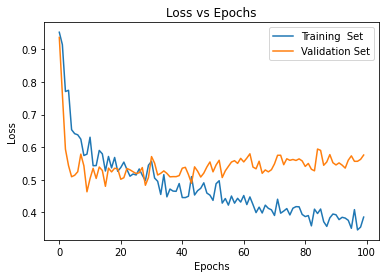

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training  Set', 'Validation Set'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss vs Epochs')

Hence After L2 regularization and dropout, the problem of overfitting is pretty much resolved.

## Callbacks

![image.png](attachment:image.png)

### Introduction to Callbacks

In [41]:
from tensorflow.keras.callbacks import Callback

callbacks module contain all the callbacks while Callback is the base class from which we will inherit the functions.

In [42]:
class Training_Callback(Callback):
    def on_train_begin(self, logs= None):
        print("Training Started...")
    def on_train_batch_begin(self,batch, logs=None):
        print(f"Training Started for {batch} Batch..")
    def on_epoch_begin(self, epoch, logs = None):
        print(f"Training of Epoch {epoch}")
    def on_train_batch_end(self, batch, logs =False):
        print(f'Training of {batch} Batch Ended')
    def on_epoch_end(self,epoch, logs = None):
        print(f'Trainig of {epoch} Epoch ended')
    def on_train_end(self, logs=None):
        print("Training Ended........")

In [43]:
model = get_regularized_model(1e-5,0.3)

In [44]:
model.compile(optimizer='adam',
             loss = 'mse')

In [45]:
history = model.fit(train_data, train_y, epochs =3, batch_size =128, verbose = False, callbacks = [Training_Callback()])

Training Started...
Training of Epoch 0
Training Started for 0 Batch..
Training of 0 Batch Ended
Training Started for 1 Batch..
Training of 1 Batch Ended
Training Started for 2 Batch..
Training of 2 Batch Ended
Training Started for 3 Batch..
Training of 3 Batch Ended
Trainig of 0 Epoch ended
Training of Epoch 1
Training Started for 0 Batch..
Training of 0 Batch Ended
Training Started for 1 Batch..
Training of 1 Batch Ended
Training Started for 2 Batch..
Training of 2 Batch Ended
Training Started for 3 Batch..
Training of 3 Batch Ended
Trainig of 1 Epoch ended
Training of Epoch 2
Training Started for 0 Batch..
Training of 0 Batch Ended
Training Started for 1 Batch..
Training of 1 Batch Ended
Training Started for 2 Batch..
Training of 2 Batch Ended
Training Started for 3 Batch..
Training of 3 Batch Ended
Trainig of 2 Epoch ended
Training Ended........


Now similar callback function can be generated for the test callback but as in testing, there are no epochs involved so epoch functions will not be present there. and that callback can be given as input to model.evaluate.

In [46]:
class Testing_Callback(Callback):
    def on_test_begin(self, logs= None):
        print("Testing Started...")
    def on_test_batch_begin(self,batch, logs=None):
        print(f"Testing Started for {batch} Batch..")
    def on_test_batch_end(self, batch, logs =False):
        print(f'Testing of {batch} Batch Ended')
    def on_test_end(self, logs=None):
        print("Testing Ended........")

In [47]:
model.evaluate(test_data, test_y, verbose =False, callbacks = [Testing_Callback()])

Testing Started...
Testing Started for 0 Batch..
Testing of 0 Batch Ended
Testing Started for 1 Batch..
Testing of 1 Batch Ended
Testing Ended........


0.6854146122932434

In [48]:
class Prediction_Callback(Callback):
    def on_predict_begin(self, logs= None):
        print("Prediction Started...")
    def on_predict_batch_begin(self,batch, logs=None):
        print(f"Prediction Started for {batch} Batch..")
    def on_predict_batch_end(self, batch, logs =False):
        print(f'Prediction of {batch} Batch Ended')
    def on_predict_end(self, logs=None):
        print("Prediction Ended........")

In [49]:
model.predict(test_data, verbose =False, callbacks = [Prediction_Callback()])

Prediction Started...
Prediction Started for 0 Batch..
Prediction of 0 Batch Ended
Prediction Started for 1 Batch..
Prediction of 1 Batch Ended
Prediction Ended........


array([[ 0.29870644],
       [ 0.31453076],
       [-0.27811563],
       [ 0.12773383],
       [ 0.2653818 ],
       [ 0.4703128 ],
       [ 0.24040309],
       [ 0.46737412],
       [ 0.3841028 ],
       [-0.30189797],
       [ 0.27624023],
       [ 0.46351334],
       [-0.52899814],
       [-0.5742471 ],
       [-0.00438905],
       [-0.14326483],
       [-0.6388348 ],
       [-0.02443994],
       [ 0.2712513 ],
       [ 0.31094065],
       [ 0.1982939 ],
       [-0.19884586],
       [ 0.41221997],
       [-0.546057  ],
       [-0.23303801],
       [ 0.09732007],
       [ 0.08472978],
       [-0.41372654],
       [ 0.18610078],
       [ 0.59763026],
       [ 0.11120862],
       [-0.39559737],
       [-0.3618828 ],
       [-0.00643269],
       [ 0.21414453],
       [-0.24409923],
       [-0.01005416],
       [ 0.03383434],
       [ 0.27475443],
       [ 0.20308395],
       [ 0.69131243],
       [-0.5462388 ],
       [ 0.17854011],
       [ 0.16910711],
       [ 0.0686067 ]], dtype=flo

## Early Stopping

Now EarlyStopping is predefined callback class present inn callbacks.
- **monitor** argument is used to monitor the quantity obtained from model.compile, it may be accuracy or loss.
- **patience** indicates the number of epochs to wait and notice the monitor quantity before early stopping.
- **min_delta** is the minimum change in positive direction that will be considered as an improvement.
- **mode** is by default auto which function decides based on the quantity but it can also be set manually as max or min depending upon the quantity.

In [50]:
def get_model():
    model = Sequential([
        Dense(units = 128, activation ='relu', input_shape= (train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

In [51]:
unregularized  = get_model()

In [52]:
unregularized.compile(loss='mse', optimizer = 'adam')

In [53]:
history = unregularized.fit(train_data, train_y, validation_split = 0.15 , verbose = False, epochs =100, batch_size =64,
                           callbacks = [tf.keras.callbacks.EarlyStopping(patience =2)])

In [54]:
unregularized.evaluate(test_data, test_y, verbose =2)

2/2 - 0s - loss: 0.5655 - 19ms/epoch - 10ms/step


0.5655269026756287

#### Now Regularized Model

In [55]:
regularized = get_regularized_model(1e-8,0.2)

In [56]:
regularized.compile(optimizer ='adam',
                   loss = 'mse')

In [57]:
reg_history = regularized.fit(train_data, train_y, epochs =100, validation_split = 0.15, verbose =False,
                             batch_size = 64, callbacks  = [tf.keras.callbacks.EarlyStopping(patience=2)])

In [58]:
regularized.evaluate(test_data,test_y,verbose =2)

2/2 - 0s - loss: 0.5001 - 24ms/epoch - 12ms/step


0.500089168548584

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

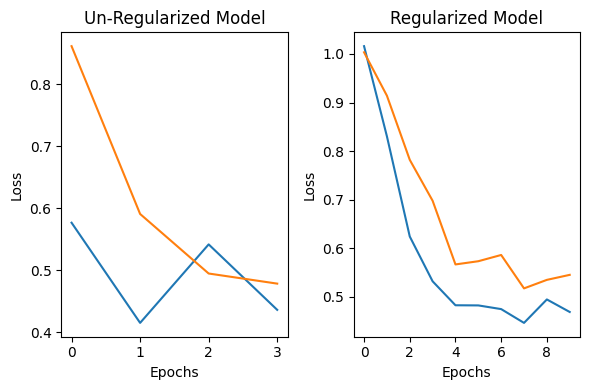

In [60]:
fig = plt.figure(dpi = 100)

fig.add_subplot(121)
plt.title('Un-Regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

fig.add_subplot(122)
plt.plot(reg_history.history['val_loss'])
plt.plot(reg_history.history['loss'])
plt.title('Regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()